In [1]:
# import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import datasets
import tensorflow.keras.datasets.mnist as mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

## Multi-Layer Perceptron for Regression

In [2]:
# generate random data for regression
X, y = datasets.make_regression(n_samples=100, n_features=2)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# build the regression model and fit the training data
reg = MLPRegressor(solver='adam', 
                    hidden_layer_sizes=(10),
                    activation='logistic',
                    max_iter=50000)

reg.fit(X_train, y_train)

# make prediction using the trained model
y_pred = reg.predict(X_test)

# print out the accuracy score
print("The MSE is {:.2f} \n".format(mean_squared_error(y_test, y_pred)))

for i in range(len(y_test)):   
    print("X={}, y={:.3f} has a predicted output of {:.3f}".format(X_test[i], y_test[i], y_pred[i]))

The MSE is 7.43 

X=[ 0.56287507 -0.31214437], y=28.637 has a predicted output of 28.701
X=[0.67890594 1.15284042], y=46.859 has a predicted output of 47.006
X=[ 1.37913788 -0.40175494], y=73.091 has a predicted output of 73.170
X=[ 1.13078355 -0.61817611], y=57.603 has a predicted output of 57.475
X=[-0.48447315  0.66793423], y=-21.433 has a predicted output of -21.439
X=[-1.19228511 -0.06513625], y=-66.510 has a predicted output of -66.588
X=[0.56097055 1.12460254], y=40.105 has a predicted output of 40.061
X=[0.38232592 0.02239105], y=21.340 has a predicted output of 21.319
X=[ 2.36736081 -1.87513269], y=115.915 has a predicted output of 107.312
X=[ 1.35964411 -1.85826425], y=60.280 has a predicted output of 59.853


## Multi-Layer Perceptron for Classification

In [3]:
# generate a random dataset for classification
X, y = datasets.make_classification(n_samples=100, n_features=5)

# split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1)

# build and train the MLP classifier
clf = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=(5, 5),
                    activation='relu',
                    max_iter=10000)

clf.fit(X_train, y_train)

# make predictions using the trained MLP classifier
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# print out the accuracy score and test data results
accu = accuracy_score(y_test, y_pred)
print("The prediction accuracy is {:.0f}% \n".format(100*accu))

# print out the test data that are mis-classified
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        print("{} in category {} is mistakenly classified to cateogry {} with a probability of {:.3f}\n".format(X_test[i], y_test[i], y_pred[i], max(y_pred_proba[i])))

The prediction accuracy is 90% 

[-0.33658184 -0.93270487  3.00178024  0.59779242 -1.10272733] in category 0 is mistakenly classified to cateogry 1 with a probability of 0.921



In [4]:
# load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# develop and train a classification model based on multi-layer perceptron
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=(10, 10),
                    activation='relu',
                    max_iter=10000)

clf.fit(X_train, y_train)

# make prediction using the trained model
y_pred = clf.predict(X_test)

# print out the accuracy score
print("The prediction accuracy is {:.2f}% \n".format(100*accuracy_score(y_test, y_pred)))

# print out the test data that are mis-classified
for i in range(len(y_test)):   
    if y_test[i] != y_pred[i]:
        print("Prediction of {} in category {} was mistaken to cateogry {}".format(X_test[i], y_test[i], y_pred[i]))

The prediction accuracy is 93.33% 

Prediction of [6.  2.7 5.1 1.6] in category 1 was mistaken to cateogry 2


## Multi-Layer Perceptron Classifier for Image Processing

Iteration 1, loss = 0.42848015
Iteration 2, loss = 0.20143446
Iteration 3, loss = 0.15239314
Iteration 4, loss = 0.12096471
Iteration 5, loss = 0.10044422
Iteration 6, loss = 0.08488432
Iteration 7, loss = 0.07309715
Iteration 8, loss = 0.06367090
Iteration 9, loss = 0.05634828
Iteration 10, loss = 0.04889265
Iteration 11, loss = 0.04317030
Iteration 12, loss = 0.03799462
Iteration 13, loss = 0.03342435
Iteration 14, loss = 0.03076240
Iteration 15, loss = 0.02660936
Iteration 16, loss = 0.02397118
Iteration 17, loss = 0.02063346
Iteration 18, loss = 0.01827249
Iteration 19, loss = 0.01667057
Iteration 20, loss = 0.01485539

Training set score: 0.99825
Test set score: 0.9783


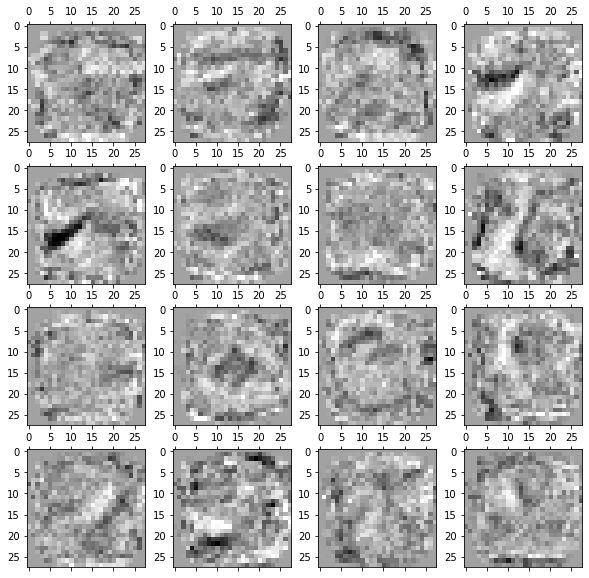

In [5]:

# load the MNIST data from TensorFlow/Keras
(X_train , y_train), (X_test , y_test) = mnist.load_data()

# flatten the images
image_vector_size = X_train.shape[1]*X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

# normalize the data
X_train = X_train / 255
X_test = X_test / 255

# build the MLP classifier
clf = MLPClassifier(solver='adam',
                   hidden_layer_sizes=(108),
                    verbose=True,
                    max_iter=20)

# ignore the warning information
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    clf.fit(X_train, y_train)

# print out classification scores
print("\nTraining set score: " + str(clf.score(X_train, y_train)))
print("Test set score: " + str(clf.score(X_test, y_test)))

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()

# make 4 x 4 subplots to visualize the coefficients
fig, axes = plt.subplots(4, 4, figsize=(10,10))

for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), 
               cmap=plt.cm.gray, 
               vmin=0.5 * vmin,
               vmax=0.5 * vmax)
plt.show()